In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df=pd.read_csv('autos_dataset.csv',usecols=['symboling','wheel-base','length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size','bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'])

In [ ]:
df.replace({'?':np.nan},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   bore               201 non-null    object 
 9   stroke             201 non-null    object 
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    object 
 12  peak-rpm           203 non-null    object 
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    object 
dtypes: float64(5), int64(5), o

In [ ]:
df.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
df['bore'].fillna(df['bore'].median(),inplace=True)
df['stroke'].fillna(df['stroke'].median(),inplace=True)
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [ ]:
df.isna().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [ ]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              205 non-null    float64
dtypes: float64(10), int64(6)
m

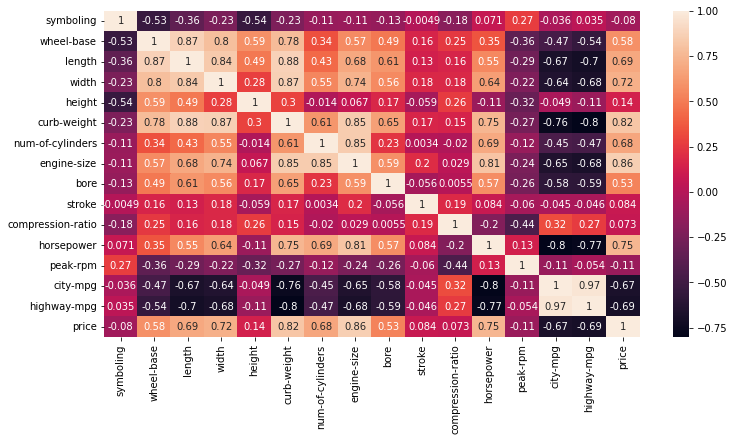

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#we only take those iv which has maximum correlation with dv such as horsepower, bore, engine size, noc, curbwt, len, wid

In [ ]:
df.drop(['symboling','wheel-base','height','curb-weight','stroke','compression-ratio','peak-rpm','city-mpg','highway-mpg'],axis=1,inplace=True)

In [ ]:
df

,length,width,num-of-cylinders,engine-size,bore,horsepower,price
0,168.8,64.1,4,130,3.47,111.0,13495.0
1,168.8,64.1,4,130,3.47,111.0,16500.0
2,171.2,65.5,6,152,2.68,154.0,16500.0
3,176.6,66.2,4,109,3.19,102.0,13950.0
4,176.6,66.4,5,136,3.19,115.0,17450.0
...,...,...,...,...,...,...,...
200,188.8,68.9,4,141,3.78,114.0,16845.0
201,188.8,68.8,4,141,3.78,160.0,19045.0
202,188.8,68.9,6,173,3.58,134.0,21485.0
203,188.8,68.9,6,145,3.01,106.0,22470.0


In [ ]:
x=df.drop('price',axis=1)
y=df['price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print("mean squared error is",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error is",mae)
r_score=r2_score(y_test,y_pred)
print("r2_score is",r_score)

mean squared error is 44922394.525656156
mean absolute error is 4077.371637686415
r2_score is -0.014901956988483622


In [ ]:
import pickle

In [ ]:
pickle.dump(lr_model,open('lr_autos.pkl','wb'))

In [ ]:
result=lr_model.predict([[168.8,64.1,4,130,3.48,111.0]])
print(result)

[12662.01089071]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
